In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

In [1]:
pip install PySimpleGUI

     -------------------------------------- 512.7/512.7 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import PySimpleGUI as sg
import time
mylist = [1,2,3,4,5,6,7,8]
for i, item in enumerate(mylist):
    sg.one_line_progress_meter('This is my progress meter!', i+1, len(mylist), '-key-')
    time.sleep(1)

In [2]:
df = pd.read_csv(r'Data\train_1.csv', delimiter = ';')

C:\Users\user\AppData\Local\Temp\ipykernel_14352\1079349043.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Data\train_1.csv', delimiter = ';')


In [3]:
df1 = pd.read_csv(r'Data\train_2.csv', delimiter = ';')

C:\Users\user\AppData\Local\Temp\ipykernel_14352\2562001104.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'Data\train_2.csv', delimiter = ';')


In [4]:
df1

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0
...,...,...,...,...,...,...,...,...,...,...
199995,500000004694875418,60,5,42,2,3,3,0,60000.0,62.0
199996,500000004694884558,19,0,37,2,-1,4,1,68000.0,40.0
199997,500000004694909288,33,3,44,2,1,1,2,58000.0,26.0
199998,500000004694952000,0,0,31,2,-1,-1,0,NaN,79.0


In [5]:
df

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000001271933224,1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...
1,500000001089710588,2,20.08.2021 18:00:39,7311,503,AVITO\7 LESNAYA STR\MOSCOW\125196 RUSRUS
2,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...
3,500000000608267511,2,31.10.2021 16:03:14,5411,"249,95",VERNYJ 1361\2 MIRA STR\RAMENSKOE\140105 RUSRUS
4,500000001639102687,1,29.10.2021 13:13:50,5814,290,RESTORAN MGRILLCAFE.\LEVAYA STORONA 423-J KM A...
...,...,...,...,...,...,...
12845070,500000000054762689,2,03.07.2021 8:10:34,5411,1202,NaN
12845071,500000000002290038,1,09.08.2021,5411,955,NaN
12845072,500000000005033472,2,05.10.2021 14:42:52,5311,"1198,1",NaN
12845073,500000000054330593,1,25.09.2021 21:21:02,5411,"435,74",NaN


In [6]:
fin = df.merge(df1, left_on = 'ID',right_on = 'ID', how = 'outer')

In [7]:
fin.dropna()

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
294,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...,149,5,43,2,-1,3,0,102000,79.0
295,500000000004725733,1,18.10.2021 9:06:31,5912,550,TVOYAAPTEKA.RF\45 POBEDY PR-T\KOMSOM-NA-AMU\68...,149,5,43,2,-1,3,0,102000,79.0
296,500000000004725733,1,21.10.2021 7:31:27,4131,34,TRANSPORT KOMSOMOLSK\13 LIT A ALLEYA TRUDA STR...,149,5,43,2,-1,3,0,102000,79.0
297,500000000004725733,1,16.10.2021 6:59:12,4812,1989,MTS D113\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...,149,5,43,2,-1,3,0,102000,79.0
298,500000000004725733,2,29.10.2021 7:48:08,5812,4750,STRELEC\35 MPOPOVA STR\PARTIZANSK\692871 RU...,149,5,43,2,-1,3,0,102000,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839682,500000000049797637,2,31.10.2021 16:07:44,4814,8000,VOLNA MOBAIL RAPIDA WA\CHERTANOVO SEVERNOE D. ...,59,5,55,1,1,3,1,25000,71.0
12839693,500000002648226912,2,22.09.2021 5:56:47,5499,1236,PRODUKTY 24 CHASA\54-2 CHAPAEVA\IGLINO\450000 ...,3,3,41,2,-1,-1,0,30000.0,47.0
12839694,500000002648226912,2,30.09.2021 6:50:56,4121,85,YANDEX.TAXI\14 LVA TOLSTOGO STR\MOSCOW\119021 ...,3,3,41,2,-1,-1,0,30000.0,47.0
12839738,500000000048943236,1,09.09.2021 19:13:12,7994,100,RKI\73G RIZKA STREET KYIV\KYIV\01001 26 UKR,14,13,37,1,-1,-1,0,0,64.0


In [8]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845075 entries, 0 to 12845074
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   PROD_TYPE        int64  
 2   TRANS_DTTM       object 
 3   MCC_CODE         int64  
 4   SUM_TRANS        object 
 5   LOCATION_NAME    object 
 6   MM_IN_BANK       int64  
 7   MM_W_CARD        int64  
 8   AGE              int64  
 9   GENDER           int64  
 10  EDUCATION_LEVEL  int64  
 11  MARITAL_STATUS   int64  
 12  DEPENDANT_CNT    int64  
 13  INCOME_MAIN_AMT  object 
 14  REG_CODE         float64
dtypes: float64(1), int64(10), object(4)
memory usage: 1.4+ GB


In [9]:
fin.isna().sum()

ID                        0
PROD_TYPE                 0
TRANS_DTTM                0
MCC_CODE                  0
SUM_TRANS                 0
LOCATION_NAME      10582071
MM_IN_BANK                0
MM_W_CARD                 0
AGE                       0
GENDER                    0
EDUCATION_LEVEL           0
MARITAL_STATUS            0
DEPENDANT_CNT             0
INCOME_MAIN_AMT     6450603
REG_CODE              45655
dtype: int64

In [10]:
fin.drop('LOCATION_NAME', axis=1, inplace=True)

In [11]:
fin.isna().sum()

ID                       0
PROD_TYPE                0
TRANS_DTTM               0
MCC_CODE                 0
SUM_TRANS                0
MM_IN_BANK               0
MM_W_CARD                0
AGE                      0
GENDER                   0
EDUCATION_LEVEL          0
MARITAL_STATUS           0
DEPENDANT_CNT            0
INCOME_MAIN_AMT    6450603
REG_CODE             45655
dtype: int64

In [12]:
fin.drop('INCOME_MAIN_AMT', axis=1, inplace=True)

In [13]:
fin.isna().sum()

ID                     0
PROD_TYPE              0
TRANS_DTTM             0
MCC_CODE               0
SUM_TRANS              0
MM_IN_BANK             0
MM_W_CARD              0
AGE                    0
GENDER                 0
EDUCATION_LEVEL        0
MARITAL_STATUS         0
DEPENDANT_CNT          0
REG_CODE           45655
dtype: int64

In [14]:
fin = fin.dropna()

In [15]:
fin.isna().sum()

ID                 0
PROD_TYPE          0
TRANS_DTTM         0
MCC_CODE           0
SUM_TRANS          0
MM_IN_BANK         0
MM_W_CARD          0
AGE                0
GENDER             0
EDUCATION_LEVEL    0
MARITAL_STATUS     0
DEPENDANT_CNT      0
REG_CODE           0
dtype: int64

In [16]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12799420 entries, 0 to 12845074
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   PROD_TYPE        int64  
 2   TRANS_DTTM       object 
 3   MCC_CODE         int64  
 4   SUM_TRANS        object 
 5   MM_IN_BANK       int64  
 6   MM_W_CARD        int64  
 7   AGE              int64  
 8   GENDER           int64  
 9   EDUCATION_LEVEL  int64  
 10  MARITAL_STATUS   int64  
 11  DEPENDANT_CNT    int64  
 12  REG_CODE         float64
dtypes: float64(1), int64(10), object(2)
memory usage: 1.3+ GB


In [17]:
fin['TRANS_DTTM'] = fin['TRANS_DTTM'].apply(lambda x : re.sub(r'..:..:..$','',x))

In [18]:
fin['TRANS_DTTM'] = fin['TRANS_DTTM'].apply(lambda x : re.sub(r' ','',x))

In [19]:
fin

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,REG_CODE
0,500000001271933224,1,31.10.2021,5411,"411,45",14,14,24,2,-1,1,0,32.0
1,500000001271933224,1,27.10.2021,5912,1028,14,14,24,2,-1,1,0,32.0
2,500000001271933224,1,16.10.2021,5921,"164,79",14,14,24,2,-1,1,0,32.0
3,500000001271933224,1,29.08.2021,5999,600,14,14,24,2,-1,1,0,32.0
4,500000001271933224,1,18.10.2021,4814,80,14,14,24,2,-1,1,0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12845070,500000000000560212,2,06.08.2021,5411,107,105,0,53,2,1,-1,1,20.0
12845071,500000000000560212,2,24.08.2021,5411,861,105,0,53,2,1,-1,1,20.0
12845072,500000000000560212,2,04.08.2021,5941,4999,105,0,53,2,1,-1,1,20.0
12845073,500000000000560212,2,22.08.2021,5411,"1490,19",105,0,53,2,1,-1,1,20.0


In [20]:
fin['TRANS_DTTM'] = pd.to_datetime(fin['TRANS_DTTM'], format='%d.%m.%Y')

fin['Day'] = fin['TRANS_DTTM'].dt.day
fin['Month'] = fin['TRANS_DTTM'].dt.month
fin['Year'] = fin['TRANS_DTTM'].dt.year

In [21]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12799420 entries, 0 to 12845074
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ID               int64         
 1   PROD_TYPE        int64         
 2   TRANS_DTTM       datetime64[ns]
 3   MCC_CODE         int64         
 4   SUM_TRANS        object        
 5   MM_IN_BANK       int64         
 6   MM_W_CARD        int64         
 7   AGE              int64         
 8   GENDER           int64         
 9   EDUCATION_LEVEL  int64         
 10  MARITAL_STATUS   int64         
 11  DEPENDANT_CNT    int64         
 12  REG_CODE         float64       
 13  Day              int32         
 14  Month            int32         
 15  Year             int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(10), object(1)
memory usage: 1.5+ GB


In [22]:
fin

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,REG_CODE,Day,Month,Year
0,500000001271933224,1,2021-10-31,5411,"411,45",14,14,24,2,-1,1,0,32.0,31,10,2021
1,500000001271933224,1,2021-10-27,5912,1028,14,14,24,2,-1,1,0,32.0,27,10,2021
2,500000001271933224,1,2021-10-16,5921,"164,79",14,14,24,2,-1,1,0,32.0,16,10,2021
3,500000001271933224,1,2021-08-29,5999,600,14,14,24,2,-1,1,0,32.0,29,8,2021
4,500000001271933224,1,2021-10-18,4814,80,14,14,24,2,-1,1,0,32.0,18,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12845070,500000000000560212,2,2021-08-06,5411,107,105,0,53,2,1,-1,1,20.0,6,8,2021
12845071,500000000000560212,2,2021-08-24,5411,861,105,0,53,2,1,-1,1,20.0,24,8,2021
12845072,500000000000560212,2,2021-08-04,5941,4999,105,0,53,2,1,-1,1,20.0,4,8,2021
12845073,500000000000560212,2,2021-08-22,5411,"1490,19",105,0,53,2,1,-1,1,20.0,22,8,2021


In [23]:
fin.drop('TRANS_DTTM', axis=1, inplace=True)

In [25]:
fin['SUM_TRANS'] = fin['SUM_TRANS'].apply(lambda x : re.sub(r',','.',x))

In [26]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(fin)
scaled_X

array([[ 5.29382784e+08, -1.24189491e+00, -1.18700989e-01, ...,
         1.67720119e+00,  1.36848816e+00,  0.00000000e+00],
       [ 5.29382784e+08, -1.24189491e+00,  7.84275488e-01, ...,
         1.22750432e+00,  1.36848816e+00,  0.00000000e+00],
       [ 5.29382784e+08, -1.24189491e+00,  8.00496623e-01, ...,
        -9.16207545e-03,  1.36848816e+00,  0.00000000e+00],
       ...,
       [-7.41990272e+08,  8.05221114e-01,  8.36543588e-01, ...,
        -1.35825269e+00, -4.25660713e-01,  0.00000000e+00],
       [-7.41990272e+08,  8.05221114e-01, -1.18700989e-01, ...,
         6.65383231e-01, -4.25660713e-01,  0.00000000e+00],
       [-7.41990272e+08,  8.05221114e-01,  6.07645359e-01, ...,
         7.77807449e-01, -4.25660713e-01,  0.00000000e+00]])

In [27]:
model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_X)
cluster_labels

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 0, 0, 0])

In [28]:
len(fin)

12799420

In [29]:
fin['Cluster'] = cluster_labels

<Axes: >

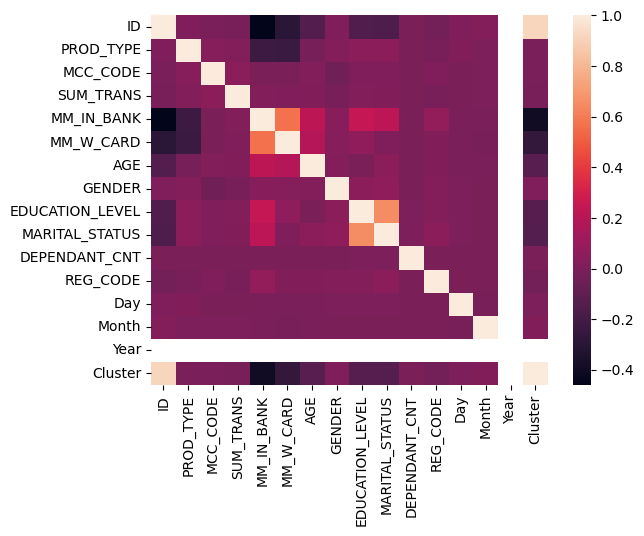

In [30]:
import seaborn as sns
sns.heatmap(fin.corr())

In [31]:
fin.corr()['Cluster']

ID                 0.915212
PROD_TYPE         -0.007194
MCC_CODE          -0.007744
SUM_TRANS         -0.013183
MM_IN_BANK        -0.392537
MM_W_CARD         -0.261576
AGE               -0.127378
GENDER             0.011159
EDUCATION_LEVEL   -0.129310
MARITAL_STATUS    -0.136823
DEPENDANT_CNT     -0.000873
REG_CODE          -0.028222
Day                0.007502
Month              0.017501
Year                    NaN
Cluster            1.000000
Name: Cluster, dtype: float64

<Axes: >

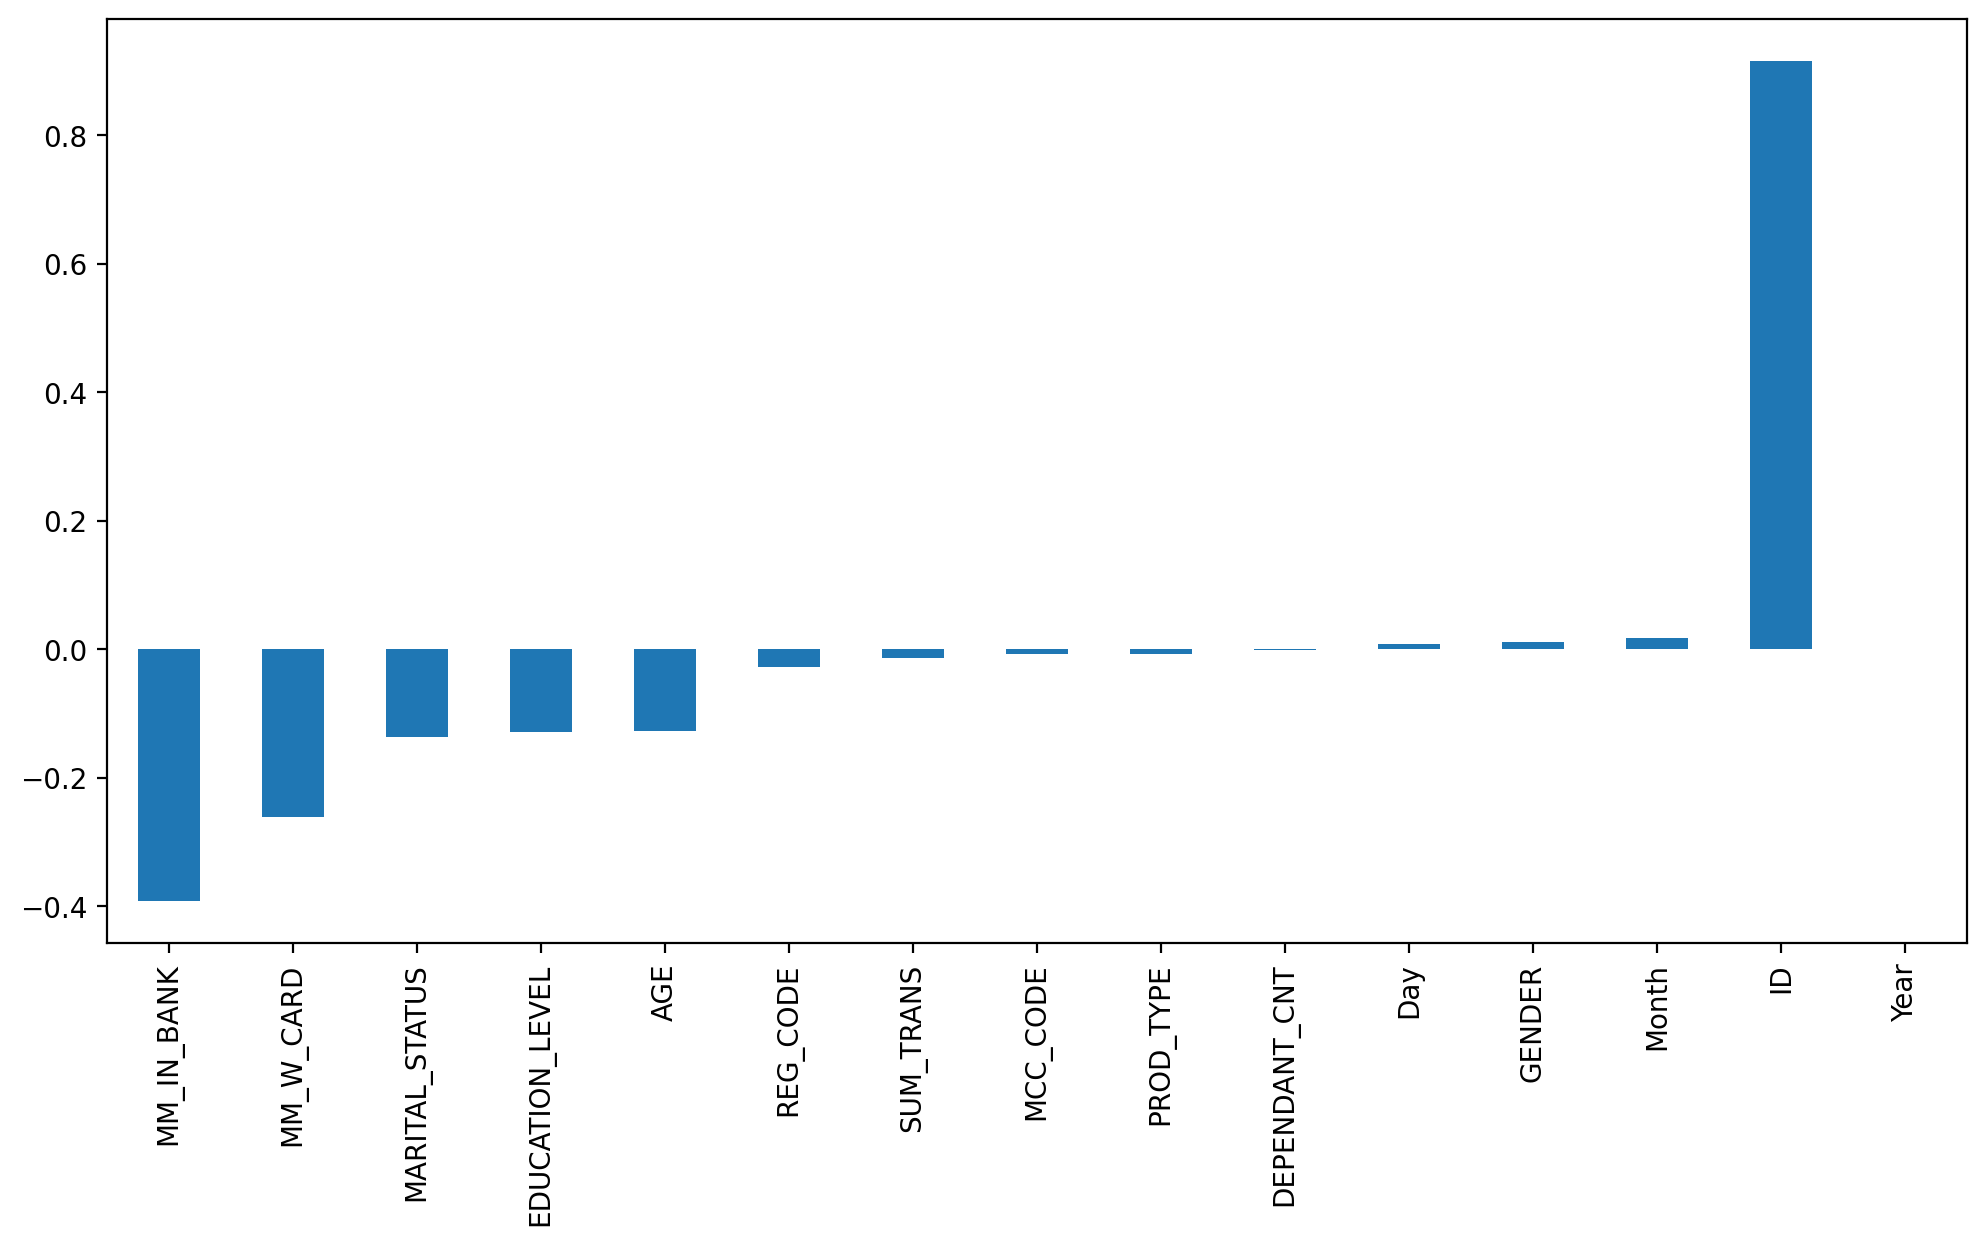

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6),dpi=200)
fin.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [33]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Text(0, 0.5, ' Sum of Squared Distances')

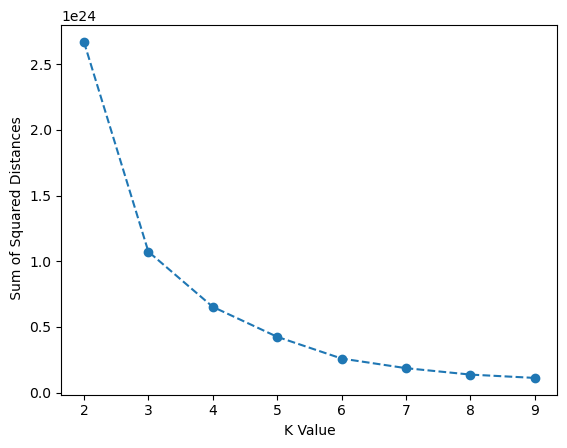

In [34]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [35]:
ssd

[2.6685287393536135e+24,
 1.0727442254294689e+24,
 6.528175383897498e+23,
 4.249503839537957e+23,
 2.595172169693513e+23,
 1.864439778561987e+23,
 1.3750084184937943e+23,
 1.1220653581674428e+23]

In [36]:
pd.Series(ssd).diff()

0             NaN
1   -1.595785e+24
2   -4.199267e+23
3   -2.278672e+23
4   -1.654332e+23
5   -7.307324e+22
6   -4.894314e+22
7   -2.529431e+22
dtype: float64

<Axes: >

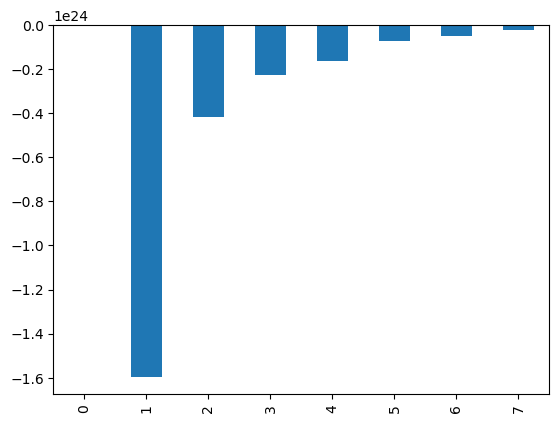

In [37]:
pd.Series(ssd).diff().plot(kind='bar')